準備

In [156]:
%matplotlib inline
import numpy as np

size = 5
a = np.arange(size*size).reshape([size, size])
a=a+1
a[size-1,size-1]=0
costs = a
goal = (size-1,size-1)
#泥の設定
mud_1 = (2,1)
mud_2 = (3,1)
mud_3 = (4,1)
costs[2,1]=10
costs[3,1]=10
costs[4,1]=10

actions = ["up","down","left","right"]

def cost(pos): 
    p = [pos[0],pos[1]]
    
    for i in [0,1]:  # 壁にぶつかったらそのまま
        if p[i] < 0:        p[i] = 0
        if p[i] >= size: p[i] = size - 1
            
    return costs[p[0]][p[1]]

描画

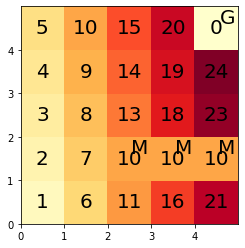

In [157]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos, action):  # mark_pos はマス目に目印の枠をつけるときに使います
    fig, ax = plt.subplots()
    mp = ax.pcolor(costs.T, cmap=plt.cm.YlOrRd,vmin=0,vmax=size*size-1)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(costs)):
        for y in range(len(costs[0])):
            plt.text(x+0.5,y+0.5,costs[x][y],ha = 'center', va = 'center', size=20)
            
    plt.text(goal[0]+0.75,goal[1]+0.75,"G",ha = 'center', va = 'center', size=20)
    plt.text(mud_1[0]+0.75,mud_1[1]+0.75,"M",ha = 'center', va = 'center', size=20)
    plt.text(mud_2[0]+0.75,mud_2[1]+0.75,"M",ha = 'center', va = 'center', size=20)
    plt.text(mud_3[0]+0.75,mud_3[1]+0.75,"M",ha = 'center', va = 'center', size=20)
    
    if mark_pos != None:
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,action,ha = 'center', va = 'center', size=20)
            
    plt.show()
    fig.clear()
    
draw(None,None)

行動価値の計算

In [158]:
def action_value(pos, action, goal):
    if pos == goal: return cost(pos)    # ゴールの価値は不変
    if pos == mud_1 or pos == mud_2 or pos == mud_3:  #泥は即時コスト5倍
        if    action == "up":      return 5+cost((pos[0],pos[1]+1))
        elif action == "down": return 5+cost((pos[0],pos[1]-1))
        elif action == "left":    return 5+cost((pos[0]-1,pos[1]))
        elif action == "right":  return 5+cost((pos[0]+1,pos[1]))
    
    if    action == "up":      return 1+cost((pos[0],pos[1]+1))
    elif action == "down": return 1+cost((pos[0],pos[1]-1))
    elif action == "left":    return 1+cost((pos[0]-1,pos[1]))
    elif action == "right":  return 1+cost((pos[0]+1,pos[1]))

スイープ

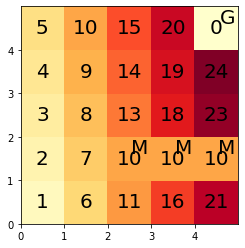

sweep 1


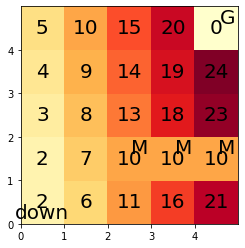

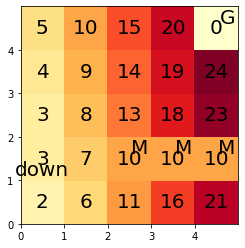

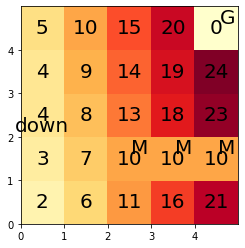

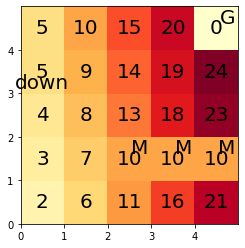

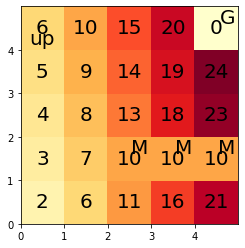

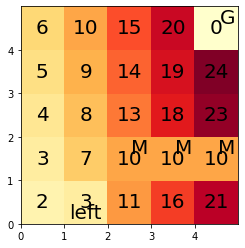

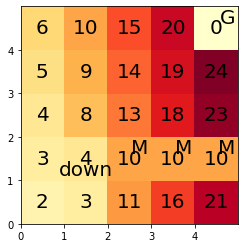

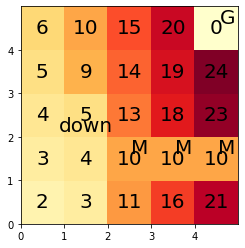

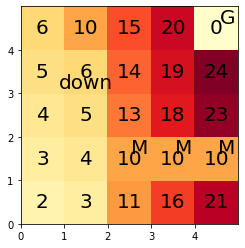

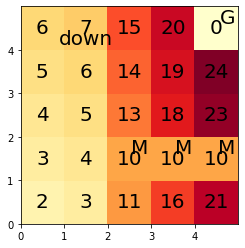

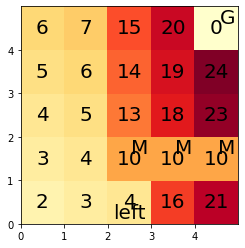

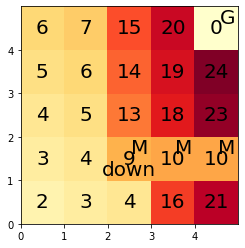

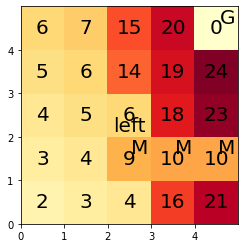

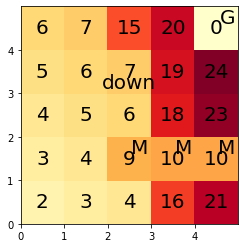

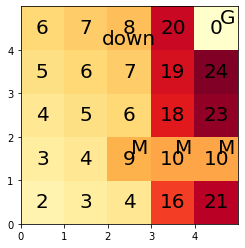

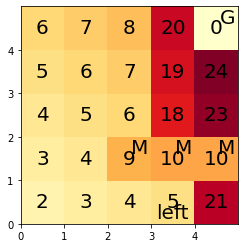

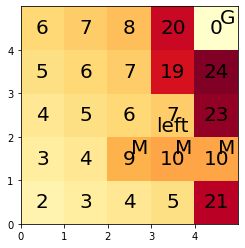

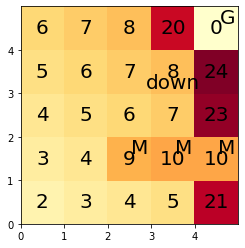

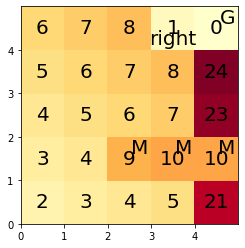

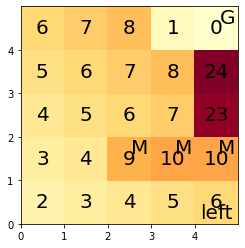

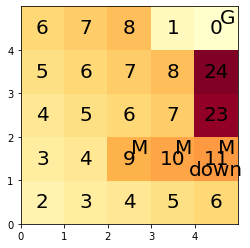

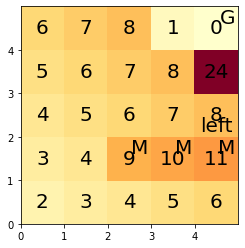

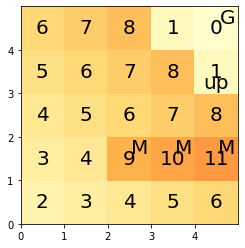

sweep 2


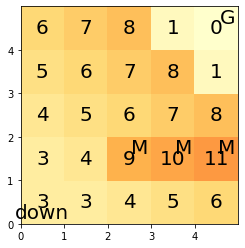

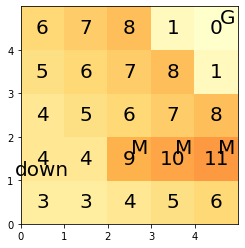

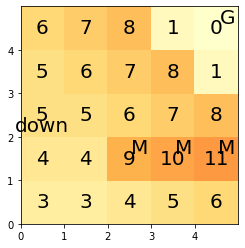

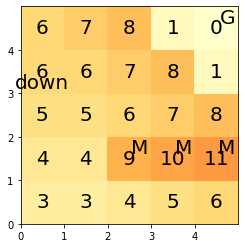

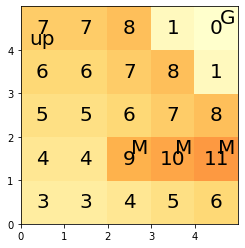

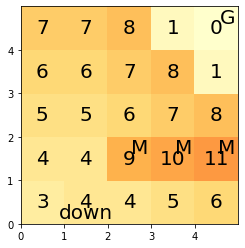

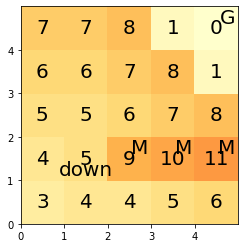

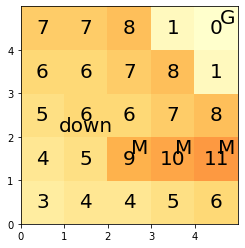

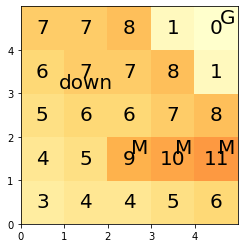

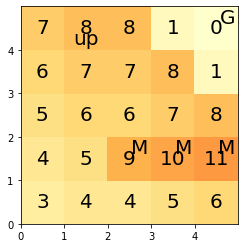

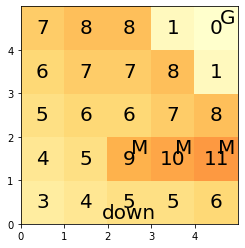

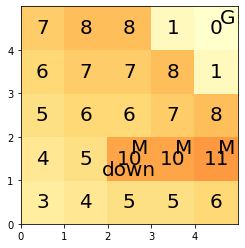

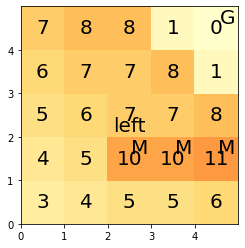

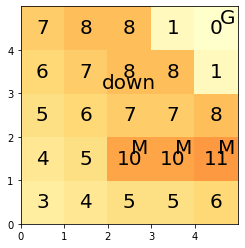

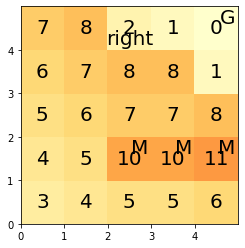

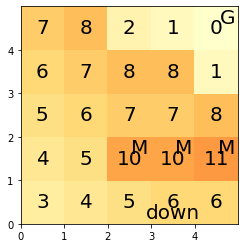

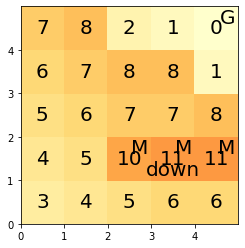

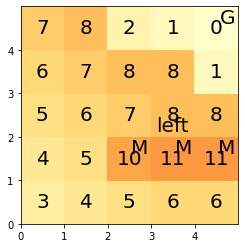

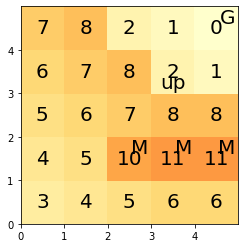

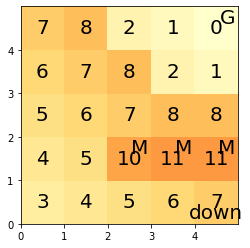

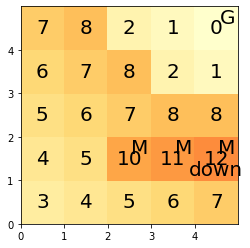

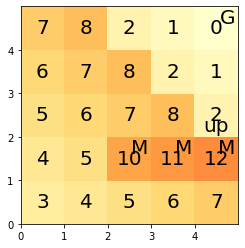

sweep 3


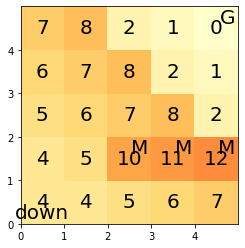

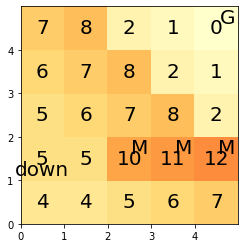

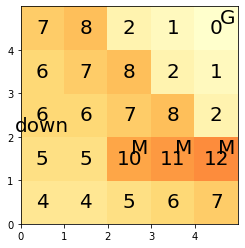

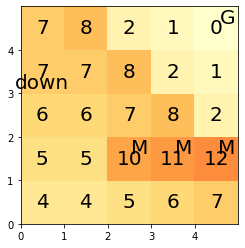

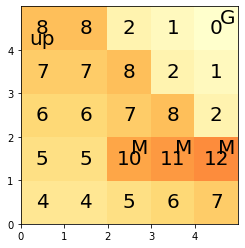

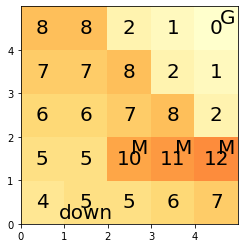

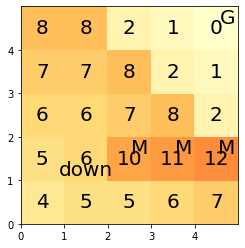

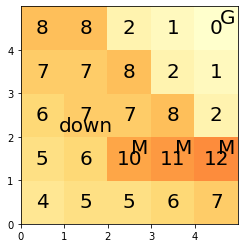

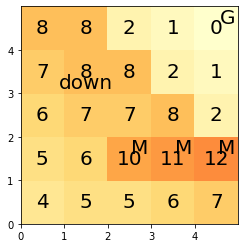

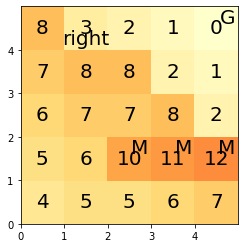

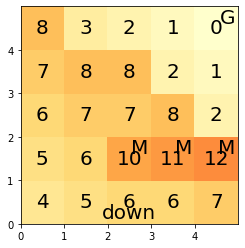

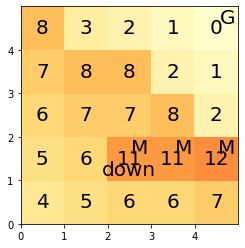

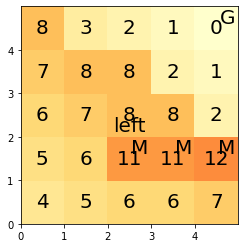

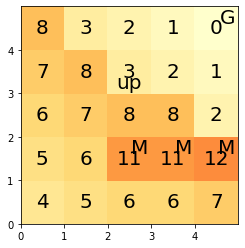

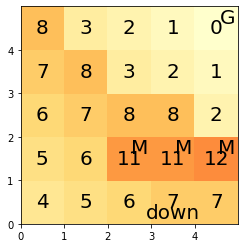

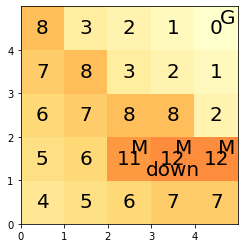

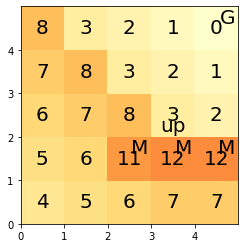

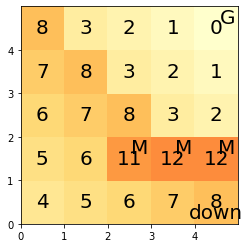

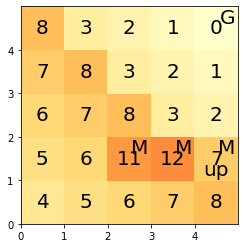

sweep 4


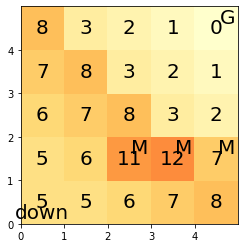

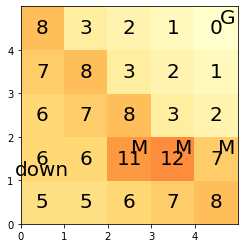

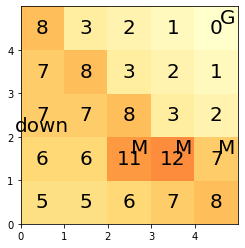

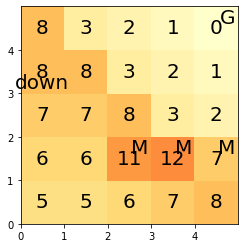

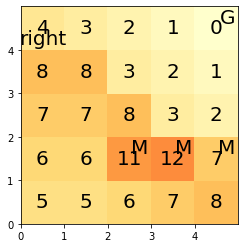

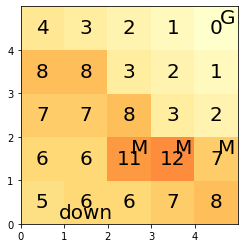

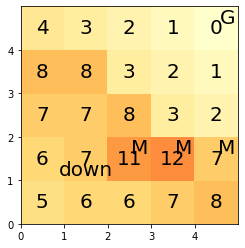

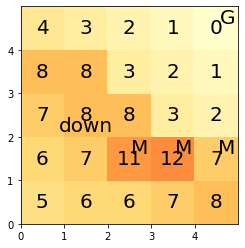

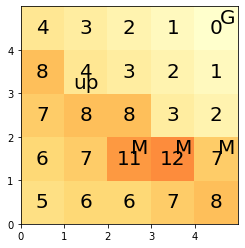

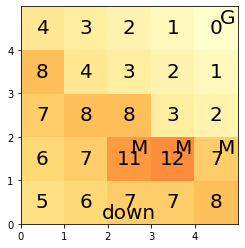

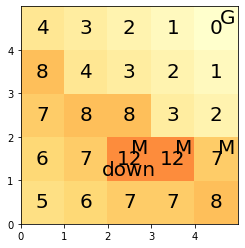

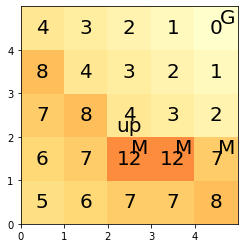

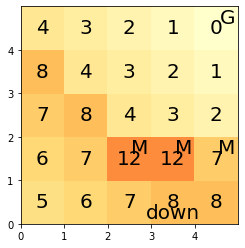

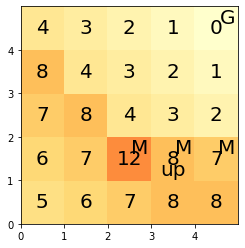

sweep 5


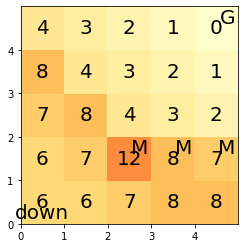

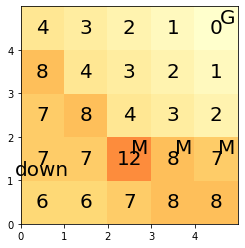

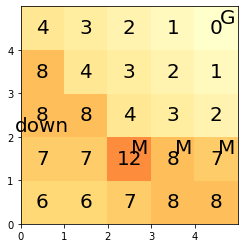

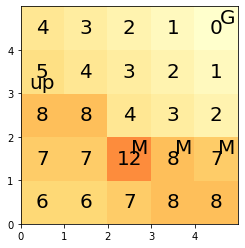

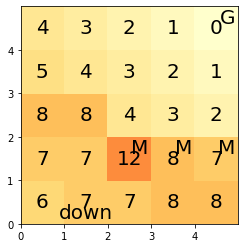

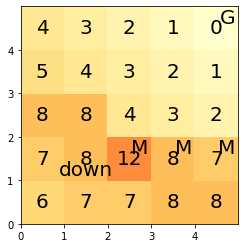

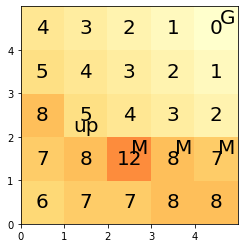

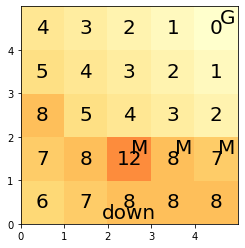

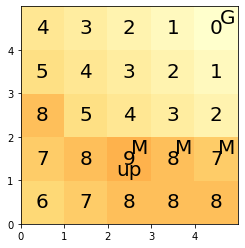

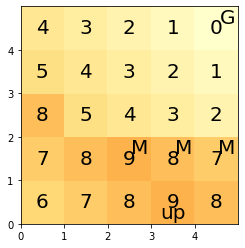

sweep 6


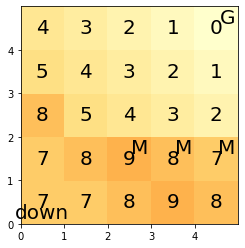

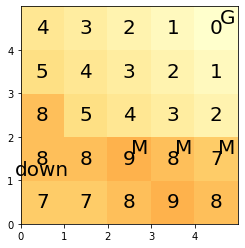

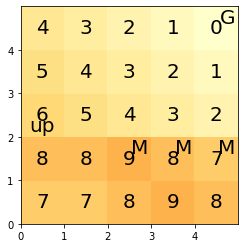

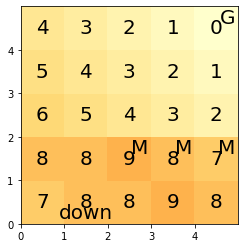

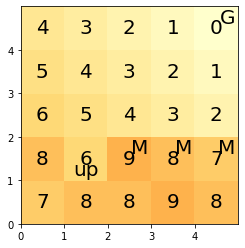

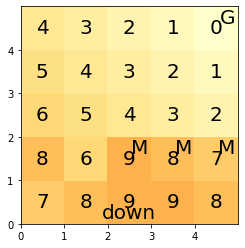

sweep 7


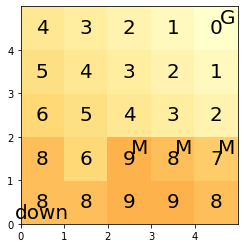

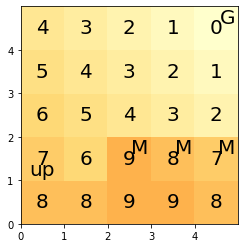

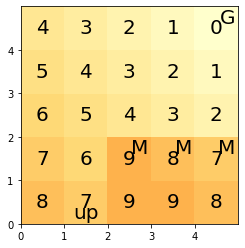

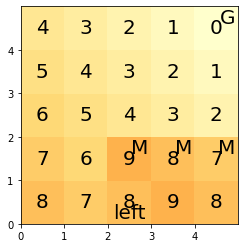

sweep 8


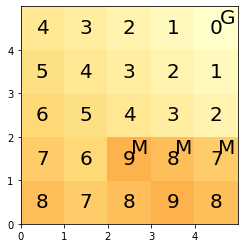

In [159]:
def sweep():
    changed = False
    
    for x in range(size):
        for y in range(size):
            min_cost = 100
            min_action = None
            for a in actions:
                c = action_value((x,y), a, goal)
                if c < min_cost:
                    min_cost = c
                    min_action = a

            if costs[x][y] != min_cost:
                costs[x][y] = min_cost
                draw((x,y),min_action)
                changed = True

    return changed

draw(None,None)
changed = True
n = 1
while changed:
    print("sweep",n)
    changed = sweep()
    n = n + 1
    
draw(None,None)